<a href="https://colab.research.google.com/github/KOMPALALOKESH/project-practice/blob/main/Regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
admission = pd.read_csv('university_admission.csv')
admission

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
admission.head(5)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admission.tail(5)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73
999,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
min = admission['TOEFL_Score'].min()
mean = admission['TOEFL_Score'].mean().round(2)
max = admission['TOEFL_Score'].max()
print('min:',min,'mean:',mean,'max:',max)
df = admission[admission['TOEFL_Score']==max]
len(df)

min: 92 mean: 107.19 max: 120


18

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0958a39d0>,
      dtype=object)

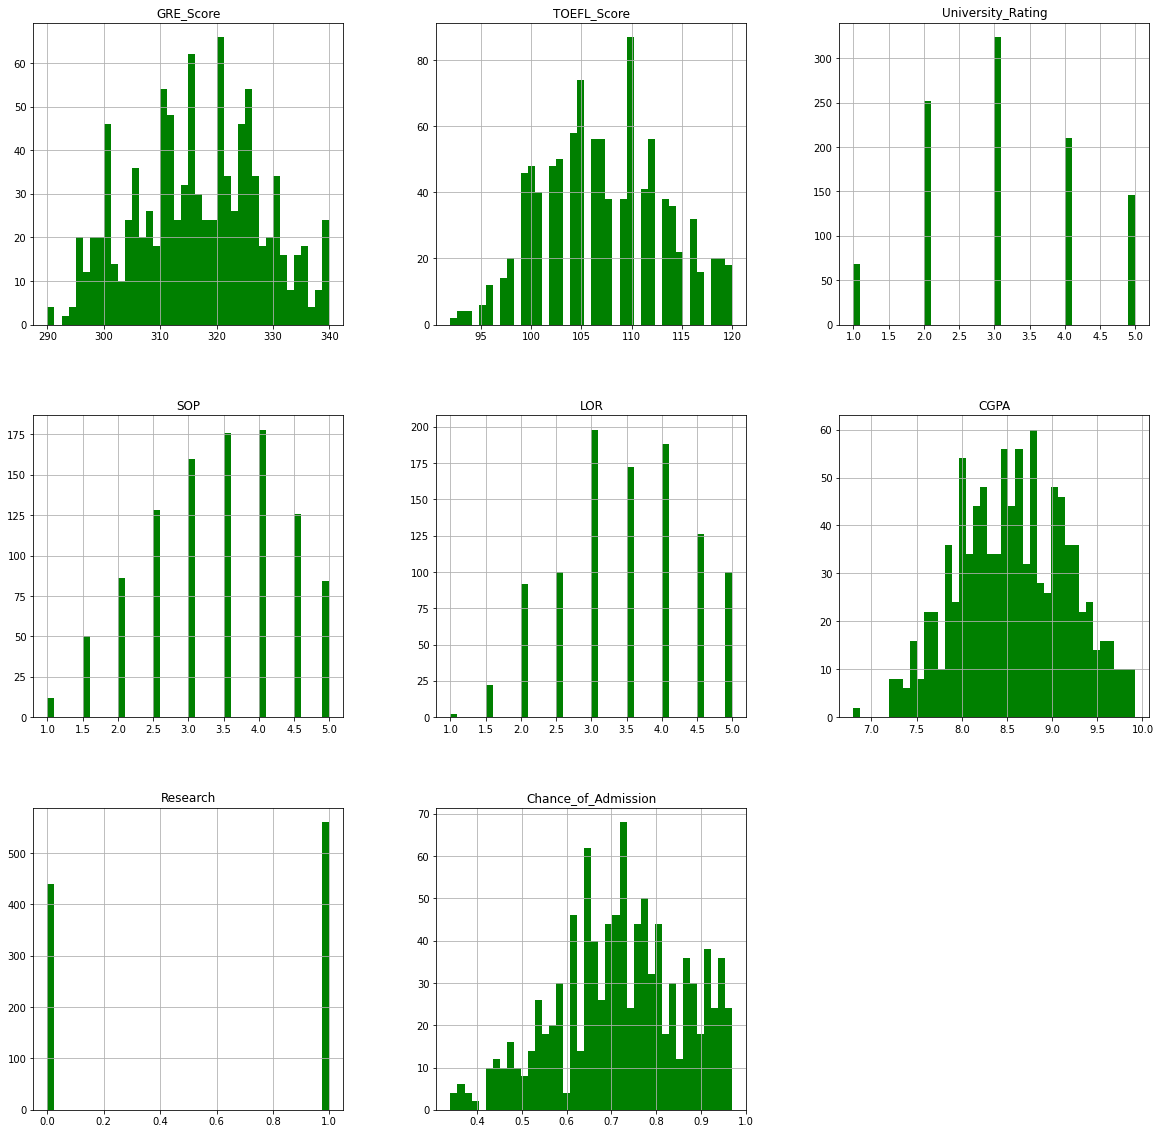

In [ ]:
admission.hist(figsize=(20,20),bins=40,color='g')

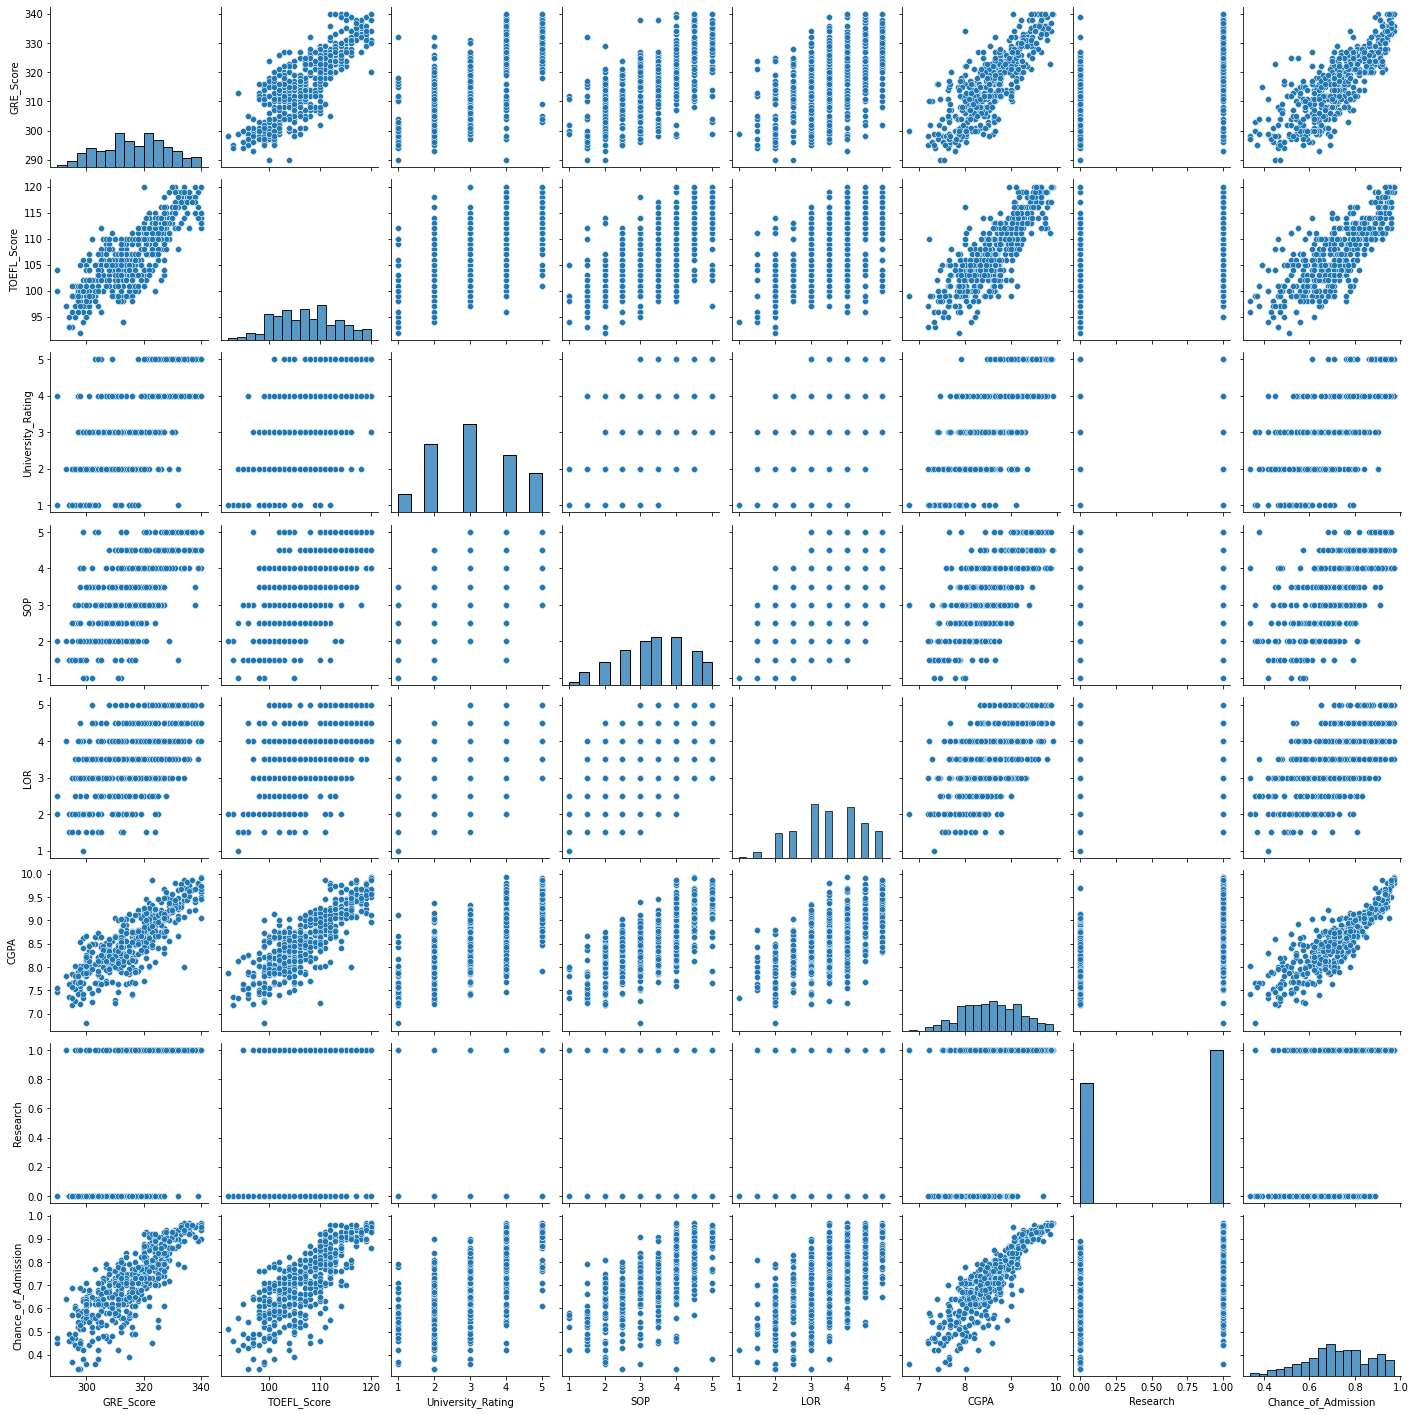

In [ ]:
sns.pairplot(admission)
plt.show()

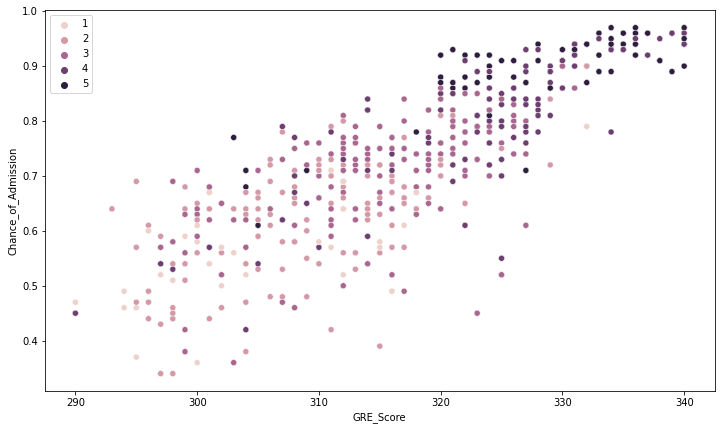

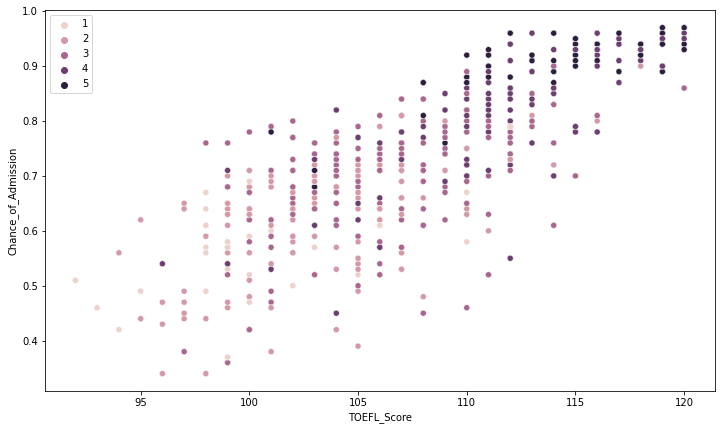

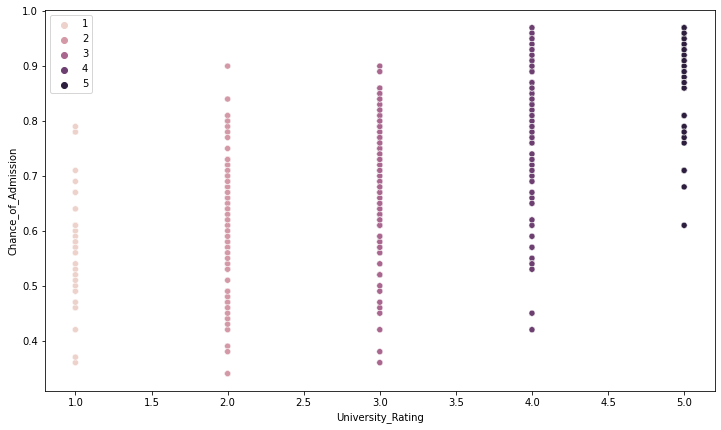

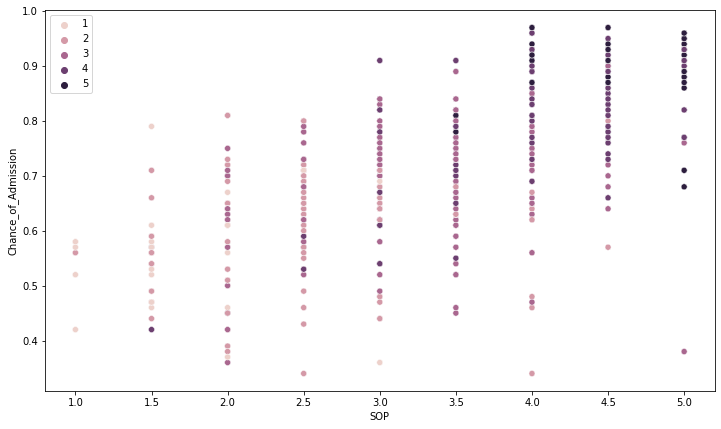

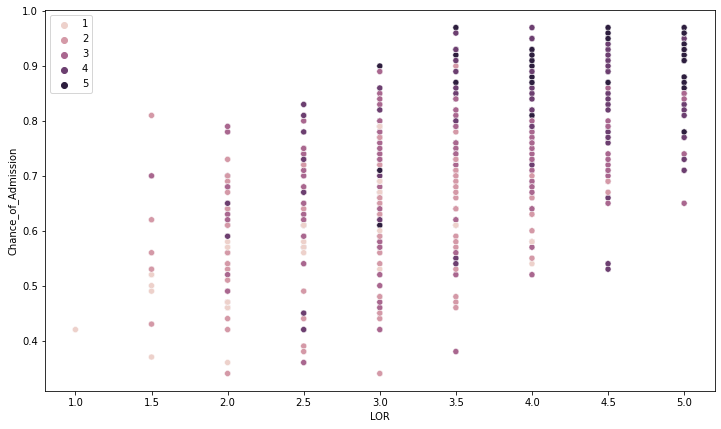

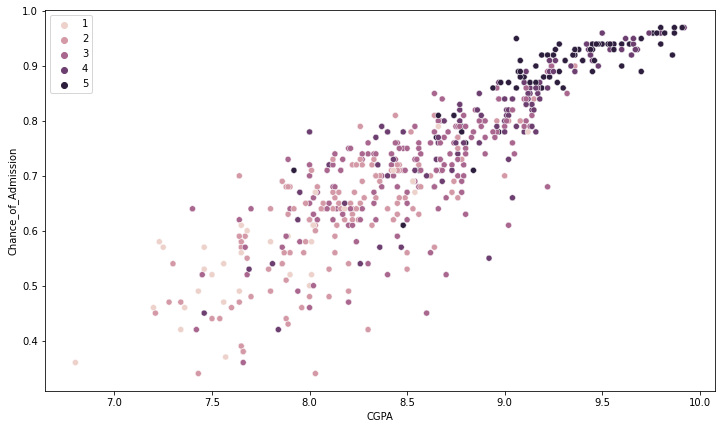

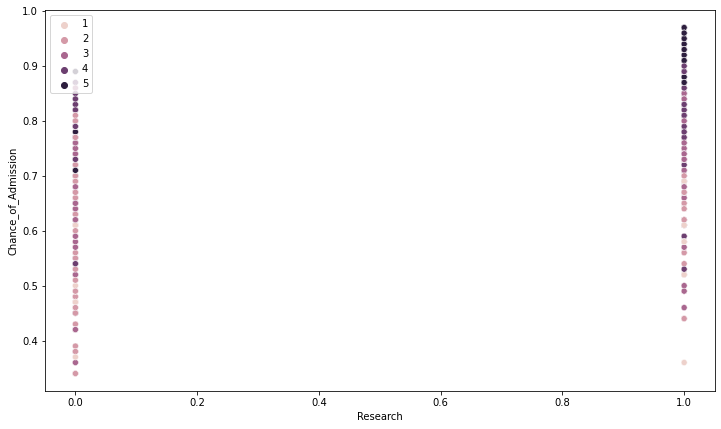

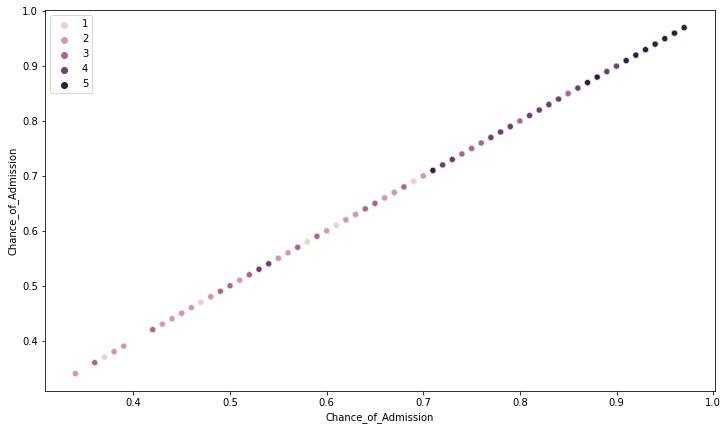

In [ ]:
for i in admission.columns:
  plt.figure(figsize=(12,7))
  sns.scatterplot(data=admission,x=i,y='Chance_of_Admission',hue='University_Rating')
  plt.legend(loc='upper left')
  plt.show()

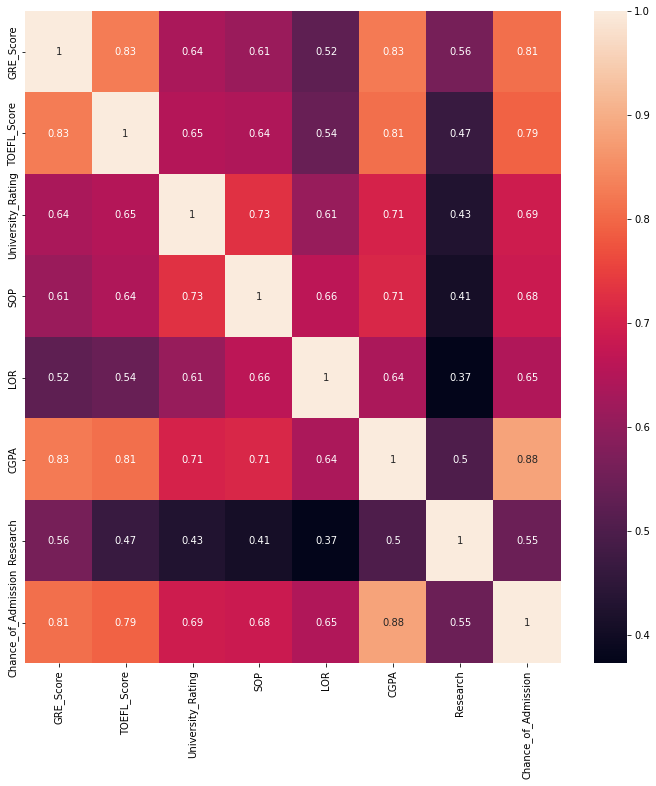

In [ ]:
correlation = admission.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation,annot=True)

In [ ]:
X = admission.drop(columns = ['Chance_of_Admission'])
X.shape

(1000, 7)

In [ ]:
y = admission['Chance_of_Admission']
y.shape

(1000,)

# Do we need to do scaling ?
* We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) 
* We need to perform Feature Scaling when we are dealing with Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points.
* There are some algorithms like **Decision Tree and Ensemble Techniques (like AdaBoost and XGBoost) that do not require scaling because splitting in these cases are based on the values**. It is important to perform feature scaling post splitting the data into training and testing.

# **Splitting of Data(25% & 75%)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
X_train.shape

(750, 7)

In [ ]:
X_test.shape

(250, 7)

# **XGBoost Regression**

In [ ]:
import xgboost as xgb
xgb.XGBRegressor().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror',max_depth=5,learning_rate=0.1,n_estimators=100)
model.fit(X_train,Y_train)

XGBRegressor(max_depth=5, objective='reg:squarederror')

In [ ]:
score = model.score(X_test,Y_test)
score

0.9197375366506972

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([0.46901655, 0.6693938 , 0.6853301 , 0.5654581 , 0.56446797,
       0.9474555 , 0.7153369 , 0.5816093 , 0.9106419 , 0.61173487,
       0.6041314 , 0.89307046, 0.49453685, 0.67530054, 0.7078661 ,
       0.63293576, 0.59783673, 0.62343967, 0.7932501 , 0.9205581 ,
       0.4986949 , 0.56090033, 0.5301987 , 0.7276398 , 0.54441327,
       0.85006493, 0.5506697 , 0.90519756, 0.5527265 , 0.72757035,
       0.6716213 , 0.7690482 , 0.50487906, 0.7046097 , 0.9409951 ,
       0.57440424, 0.46181276, 0.7593955 , 0.9584445 , 0.7732284 ,
       0.38664442, 0.5629302 , 0.6887835 , 0.3991102 , 0.92011625,
       0.94174325, 0.84037006, 0.554538  , 0.65241945, 0.67699206,
       0.79951847, 0.7290758 , 0.7363916 , 0.7276398 , 0.53921753,
       0.7810366 , 0.7075015 , 0.93279886, 0.69380057, 0.7002081 ,
       0.64264274, 0.6216751 , 0.9117347 , 0.69073313, 0.5806589 ,
       0.6407945 , 0.63414055, 0.61173487, 0.54441327, 0.90588886,
       0.5348854 , 0.7859204 , 0.9511699 , 0.6779455 , 0.92146

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score = round(r2_score(Y_test,y_predict),2) # evaluates the accuaracy between test and prediction datasets
RMSE = round(np.sqrt(mean_squared_error(Y_test,y_predict)),2)
MSE = round(mean_squared_error(Y_test,y_predict),4)
MAE = round(mean_absolute_error(y_predict,Y_test),2)

print('r2_score',r2_score,'RMSE',RMSE,'MSE',MSE,'MAE',MAE)

r2_score 0.92 RMSE 0.04 MSE 0.0015 MAE 0.03
